In [2]:
import pandas as pd
from numpy import exp
import numpy as np
import math 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure




def DF(method, Nx, f, a, c_f, x_up, x_down, T):
    #inizializzo i passi della griglia utilizzando le condizioni di stabilità
    dx = (x_up - x_down)/(Nx - 1)
    dt = c_f *dx/a
    Nt = math.ceil(T/dt) + 1
    x = np.linspace(x_down, x_up, Nx)

    #inizializzo il dato iniziale
    u_0 = f(x)

    #inizializzo la matrice della soluzione
    U = np.zeros((Nx,Nt))

    #calcolo la soluzione
    U[:,0] = u_0

    if method == 'FTCS':
        for n in range (Nt - 1):
            #applico FCTS al primo punto, usando la condizione periodica per cui j - 1 = Nx (-1 perchè la macchina parte da 0)
            U[0, n+1] = U[0,n] - a*(dt/(2*dx))*(U[1,n]-U[Nx-1,n])

            #calcolo la soluzione nei punti centrali
            U[1:(Nx-1), n+1] = U[1:(Nx-1),n] - a*(dt/(2*dx))*(U[2:(Nx),n]-U[0:(Nx-2),n])


            #applico FCTS all'ultimo punto, usando la condizione periodica per cui j +1 = 0
            U[Nx - 1, n+1] = U[Nx-1,n] - a*(dt/(2*dx))*(U[0,n]-U[Nx-2,n])

    elif method == 'Lax-F':
        for n in range (Nt - 1):
            #applico Lax-F al primo punto, usando la condizione periodica per cui j - 1 = Nx (-1 perchè la macchina parte da 0)
            U[0, n+1] = (U[1,n] + U[Nx-1,n])/2 - a*(dt/(2*dx))*(U[1,n]-U[Nx-1,n])

            #calcolo la soluzione nei punti centrali
            U[1:(Nx-1), n+1] = (U[2:(Nx),n]+U[0:(Nx-2),n])/2 - a*(dt/(2*dx))*(U[2:(Nx),n]-U[0:(Nx-2),n])


            #applico Lax-F all'ultimo punto, usando la condizione periodica per cui j +1 = 0
            U[Nx - 1, n+1] = (U[0,n]+U[Nx-2,n])/2 - a*(dt/(2*dx))*(U[0,n]-U[Nx-2,n])

    elif method == 'LeapF':
        n=0

        #applico lax-F per il primo step, usando la condizione periodica per cui j - 1 = Nx (-1 perchè la macchina parte da 0).
        #In questo modo ottengo l'informazione al tempo n-1, informazione che mi serve per usare leap-F
        U[0, n+1] = (U[1,n] + U[Nx-1,n])/2 - a*(dt/(2*dx))*(U[1,n]-U[Nx-1,n])
        U[1:(Nx-1), n+1] = (U[2:(Nx),n]+U[0:(Nx-2),n])/2 - a*(dt/(2*dx))*(U[2:(Nx),n]-U[0:(Nx-2),n])
        U[Nx - 1, n+1] = (U[1,n]+U[Nx-1,n])/2 - a*(dt/(2*dx))*(U[1,n]-U[Nx-1,n])

        for n in range (1,Nt - 1):
            #applico Lax-F al primo punto, usando la condizione periodica per cui j - 1 = Nx (-1 perchè la macchina parte da 0)
            U[0, n+1] = U[0,n-1] - a*(dt/(dx))*(U[1,n]-U[Nx-1,n])

            #calcolo la soluzione nei punti centrali
            U[1:(Nx-1), n+1] = U[1:(Nx-1),n-1] - a*(dt/(dx))*(U[2:(Nx),n]-U[0:(Nx-2),n])

            #applico Lax-F all'ultimo punto, usando la condizione periodica per cui j +1 = 0
            U[Nx - 1, n+1] = U[Nx-1,n-1] - a*(dt/(dx))*(U[0,n]-U[Nx-2,n])

    elif method == 'Lax-W':
        for n in range (Nt - 1):
            #applico Lax-W al primo punto, usando la condizione periodica per cui j - 1 = Nx (-1 perchè la macchina parte da 0)
            U[0, n+1] = U[0,n] - a*(dt/(2*dx))*(U[1,n]-U[Nx-1,n])+0.5*(a*(dt/dx))**2*(U[1,n]+U[Nx-1,n]-2*U[0,n])

            #calcolo la soluzione nei punti centrali
            U[1:(Nx-1), n+1] =  U[1:(Nx-1),n] - a*(dt/(2*dx))*(U[2:Nx,n]-U[0:(Nx-2),n])+0.5*(a*(dt/dx))**2*(U[2:Nx,n]+U[0:(Nx-2),n]-2*U[1:(Nx-1),n])

            #applico Lax-W all'ultimo punto, usando la condizione periodica per cui j +1 = 0
            U[Nx - 1, n+1] =  U[Nx-1,n] - a*(dt/(2*dx))*(U[0,n]-U[Nx-2,n])+0.5*(a*(dt/dx))**2*(U[0,n]+U[Nx-2,n]-2*U[Nx-1,n])
    
    t = np.linspace(0, T, Nt)
    X,Y = np.meshgrid(t,x)
    
    return U, X, Y
    
x_up = 10
x_down = 0
x_0 = 5
T = 20
Nx = 101
c_f = 0.5
a = 1

#f è il dato iniziale
f = lambda x: exp(-(x-x_0)**2)


U_ftcs,X,Y = DF('FTCS',Nx, f, a, c_f, x_up, x_down, T)
U_laxf = DF('Lax-F',Nx, f, a, c_f, x_up, x_down, T)[0]
np.savetxt('Valori lax_f.txt', U_laxf)
U_leapf = DF('LeapF',Nx, f, a, c_f, x_up, x_down, T)[0]
U_laxw = DF('Lax-W',Nx, f, a, c_f, x_up, x_down, T)[0]








##############################
#Faccio lo stesso esercizio, ma uso una funzione a gradino

def f1(x):
    f1=np.zeros((Nx))
    for n in range (Nx-1):
        if x[n]<4 and x[n]>6:
            f1[n]=0
        elif x[n]>=4 and x[n]<=6:
            f1[n]=1
    return f1


U_ftcs_Sf,X,Y = DF('FTCS',Nx, f1, a, c_f, x_up, x_down, T)
U_laxf_Sf = DF('Lax-F',Nx, f1, a, c_f, x_up, x_down, T)[0]
U_leapf_Sf = DF('LeapF',Nx, f1, a, c_f, x_up, x_down, T)[0]
U_laxw_Sf = DF('Lax-W',Nx, f1, a, c_f, x_up, x_down, T)[0]





In [3]:
name = ['FTCS', 'LAX-FRIEDRICHS', 'LEAPFROG', 'LAX-WENDROFF', 'FTCS STEP-FUCNTION', 'LAX-FRIEDRICHS STEP-FUCNTION', 'LEAPFROG STEP-FUCNTION', 'LAX-WENDROFF STEP-FUCNTION'  ]
valori = [U_ftcs, U_laxf, U_leapf, U_laxw, U_ftcs_Sf, U_laxf_Sf, U_leapf_Sf, U_laxw_Sf]

for i in range (8):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, valori[i], cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax.set_xlabel('t')
    ax.set_ylabel('x')
    ax.set_title(name[i])
    #fig.savefig(name[i])
    plt.close()

    

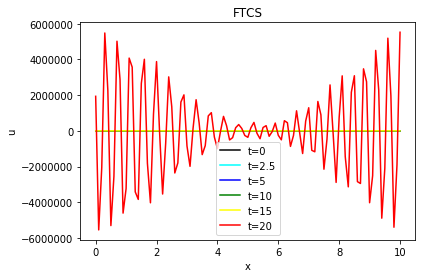

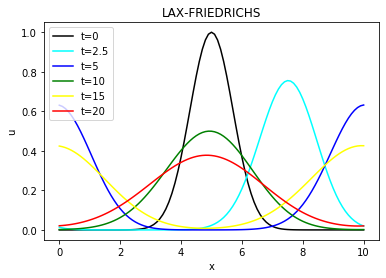

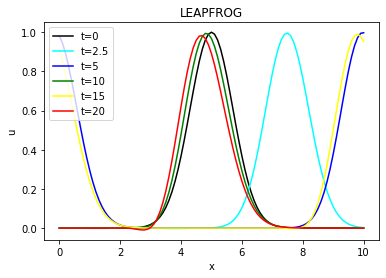

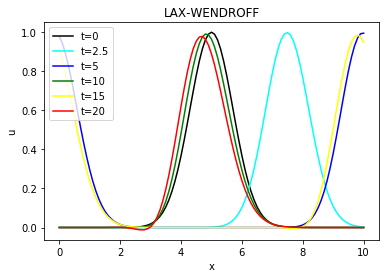

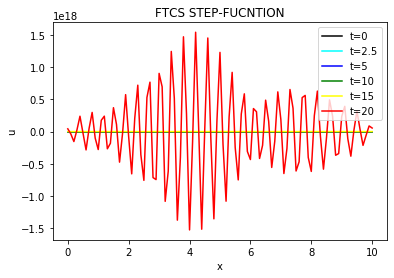

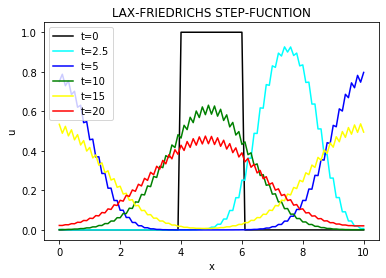

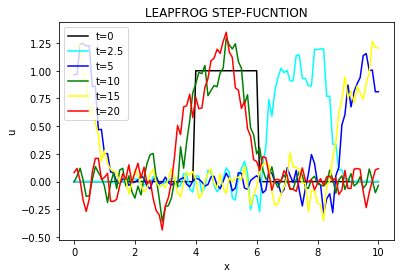

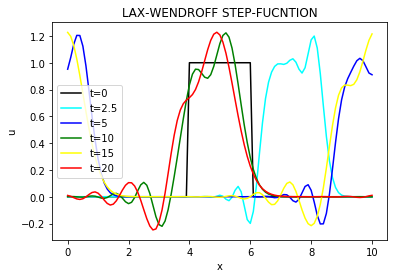

In [4]:
#inizializzo i vettori con cui poi grafico in 2-D l'evoluzione temporale della gaussiana e della step-function
x=np.linspace(x_down,x_up,Nx)
y=np.empty(len(x))
t=np.empty(len(x))
s=np.empty(len(x))
w=np.empty(len(x))
z=np.empty(len(x))
r=np.empty(len(x))
for u in range (8):
    vect = valori[u]
    for i in range (len(x)):
        y[i]=vect[i,0]
        r[i]=vect[i,50]
        z[i]=vect[i,100]
        t[i]=vect[i,200]
        s[i]=vect[i,300]
        w[i]=vect[i,400]
    
    plt.plot(x,y,color='black',label='t=0')
    plt.plot(x,r,color='cyan', label='t=2.5')
    plt.plot(x,z, color='blue',label='t=5')
    plt.plot(x,t, color='green',label='t=10')
    plt.plot(x,s, color='yellow',label='t=15')
    plt.plot(x,w, color='red',label='t=20')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.title(name[u])
    plt.legend()
    #plt.savefig(name[u]+'2D')
    plt.show()
    plt.close()
    







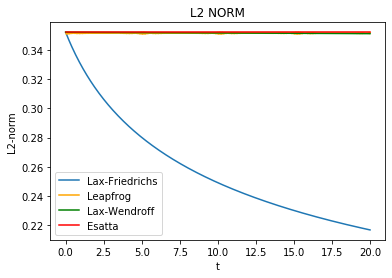

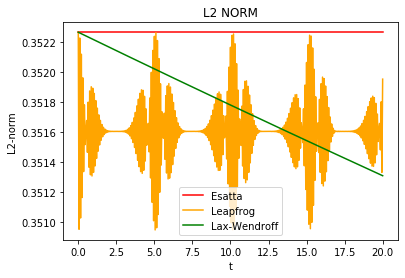

In [5]:
###VOGLIO CONSIDERARE COME VARIA LA NORMA L2 PER OSSERVARE ANCORA MEGLIO LA STABILITà DEL METODO
#eseguo prima con la gaussiana

Nt = 401
x = np.linspace(x_down, x_up, Nx)
t = np.linspace(0,T,Nt)
norma_laxf = np.empty(Nt)
norma_leapf = np.empty(Nt)
norma_laxw = np.empty(Nt)
norma_esatta = np.empty(Nt)

for n in range (Nt):
    norma_laxf[n]=np.sqrt(1/Nx*np.sum(U_laxf[:,n]**2))
    norma_leapf[n]=np.sqrt(1/Nx*np.sum(U_leapf[:,n]**2))
    norma_laxw[n]=np.sqrt(1/Nx*np.sum(U_laxw[:,n]**2))
    norma_esatta[n]=np.sqrt(1/Nx*np.sum(f(x)**2))


plt.plot(t,norma_laxf,label='Lax-Friedrichs')
plt.plot(t,norma_leapf, color= 'orange' ,label = 'Leapfrog')
plt.plot(t,norma_laxw, color='green', label = 'Lax-Wendroff')
plt.plot(t,norma_esatta,color='r', label='Esatta')
plt.title('L2 NORM')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
#plt.savefig('L2_NORM')
plt.show()
plt.close()

plt.plot(t,norma_esatta,color='r', label='Esatta')
plt.plot(t,norma_leapf, color= 'orange' ,label = 'Leapfrog')
plt.plot(t,norma_laxw, color='green', label = 'Lax-Wendroff')
plt.title('L2 NORM')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
#plt.savefig('L2_NORM zoom')
plt.show()
plt.close()


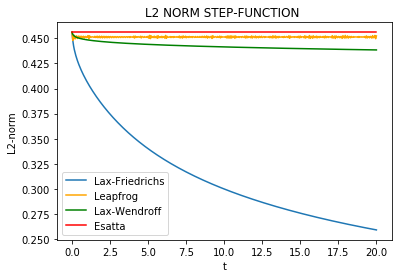

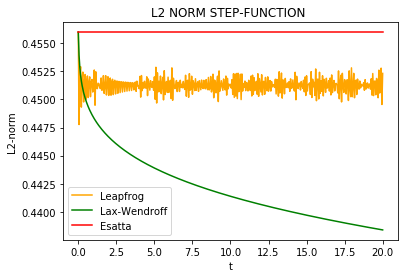

In [6]:
#Voglio l'evoluzione di L2 anche per la step function

norma_leapf_Sf = np.zeros(Nt)
norma_laxf_Sf = np.zeros(Nt)
norma_laxw_Sf = np.zeros(Nt)
norma_esatta_Sf = np.zeros(Nt)

for n in range (Nt):
    norma_laxf_Sf[n]=np.sqrt(1/Nx*np.sum(U_laxf_Sf[:,n]**2))
    norma_leapf_Sf[n]=np.sqrt(1/Nx*np.sum(U_leapf_Sf[:,n]**2))
    norma_laxw_Sf[n]=np.sqrt(1/Nx*np.sum(U_laxw_Sf[:,n]**2))
    norma_esatta_Sf[n]=np.sqrt(1/Nx*np.sum(f1(x)**2))

plt.plot(t,norma_laxf_Sf, label='Lax-Friedrichs')
plt.plot(t,norma_leapf_Sf,color='orange' , label = 'Leapfrog')
plt.plot(t,norma_laxw_Sf, color='green', label = 'Lax-Wendroff')
plt.plot(t,norma_esatta_Sf, color= 'r', label='Esatta')
plt.title('L2 NORM STEP-FUNCTION ')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
#plt.savefig('L2_NORM SF')
plt.show()
plt.close()

#plt.plot(t,norma_laxf_Sf,label='Lax-Friedrichs')
plt.plot(t,norma_leapf_Sf,color='orange' , label = 'Leapfrog')
plt.plot(t,norma_laxw_Sf, color='green', label = 'Lax-Wendroff')
plt.plot(t,norma_esatta_Sf, color= 'r', label='Esatta')
plt.title('L2 NORM STEP-FUNCTION ')
plt.xlabel('t')
plt.ylabel('L2-norm')
plt.legend()
#plt.savefig('L2_NORM SF zoom')

In [8]:
for i in range(Nt-1):
    plt.plot(x, U_laxf[:,i], label = 'Lax-Friedrichs')
    plt.plot(x, U_leapf[:,i],  label = 'Leapfrog')
    plt.plot(x, U_laxw[:,i],  label = 'Lax-Wendroff')
    plt.xlabel('x')
    plt.ylabel('u')
    plt.ylim(-0.25,1.25)
    plt.legend(loc = 'upper left')
    #plt.savefig('_'+str(i)+'_.png')
    plt.close()